In [2]:
pip install jax

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tqdm


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install jaxlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from matplotlib import pyplot as plt
from jax import numpy as jnp
import tqdm

def stack(matrices):
    return jnp.dstack([i for i in matrices])

def SVD(matrices, rank):
    approx_matrices = []
    sigmas = []
    memory_sizes = []
        
    for idx, matrix in enumerate(matrices):
        U, S, Vt = jnp.linalg.svd(matrix, full_matrices=False)
        sigmas.append(S)
        S = jnp.diag(S)
        truncated_U,  truncated_S, truncated_V = U[:, :rank],  S[:rank, :rank],  Vt[:rank, :]
        memory_sizes.append(truncated_U.nbytes + truncated_S.nbytes + truncated_V.nbytes)
        approx_matrices.append(truncated_U @ truncated_S @ truncated_V)
    
    total_size = sum(memory_sizes)
    return stack(approx_matrices), sigmas, total_size    

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Text(0.5, 1.0, 'Original Image')

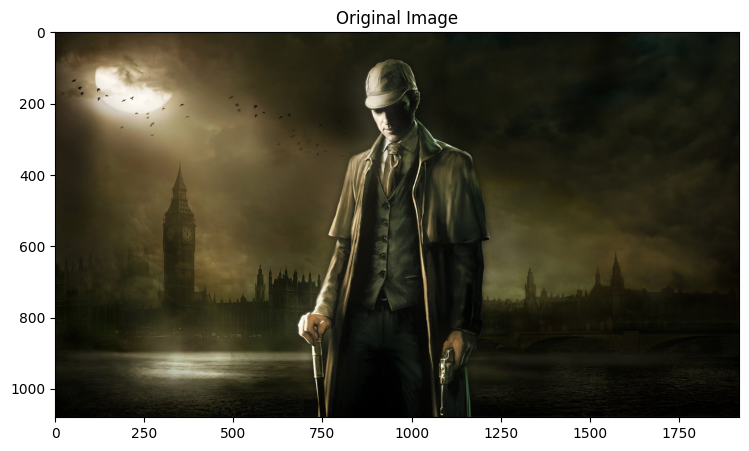

In [6]:
img = plt.imread('sherlockHolmes.jpg')
original_img_size = img.nbytes
img_frob_norm = jnp.linalg.norm(img)

plt.figure(figsize = (10, 5))
plt.imshow(img)
plt.title('Original Image')

In [7]:
img_red = img[:, :, 0]
img_green = img[:, :, 1]
img_blue = img[:, :, 2]

10it [01:41, 10.15s/it]


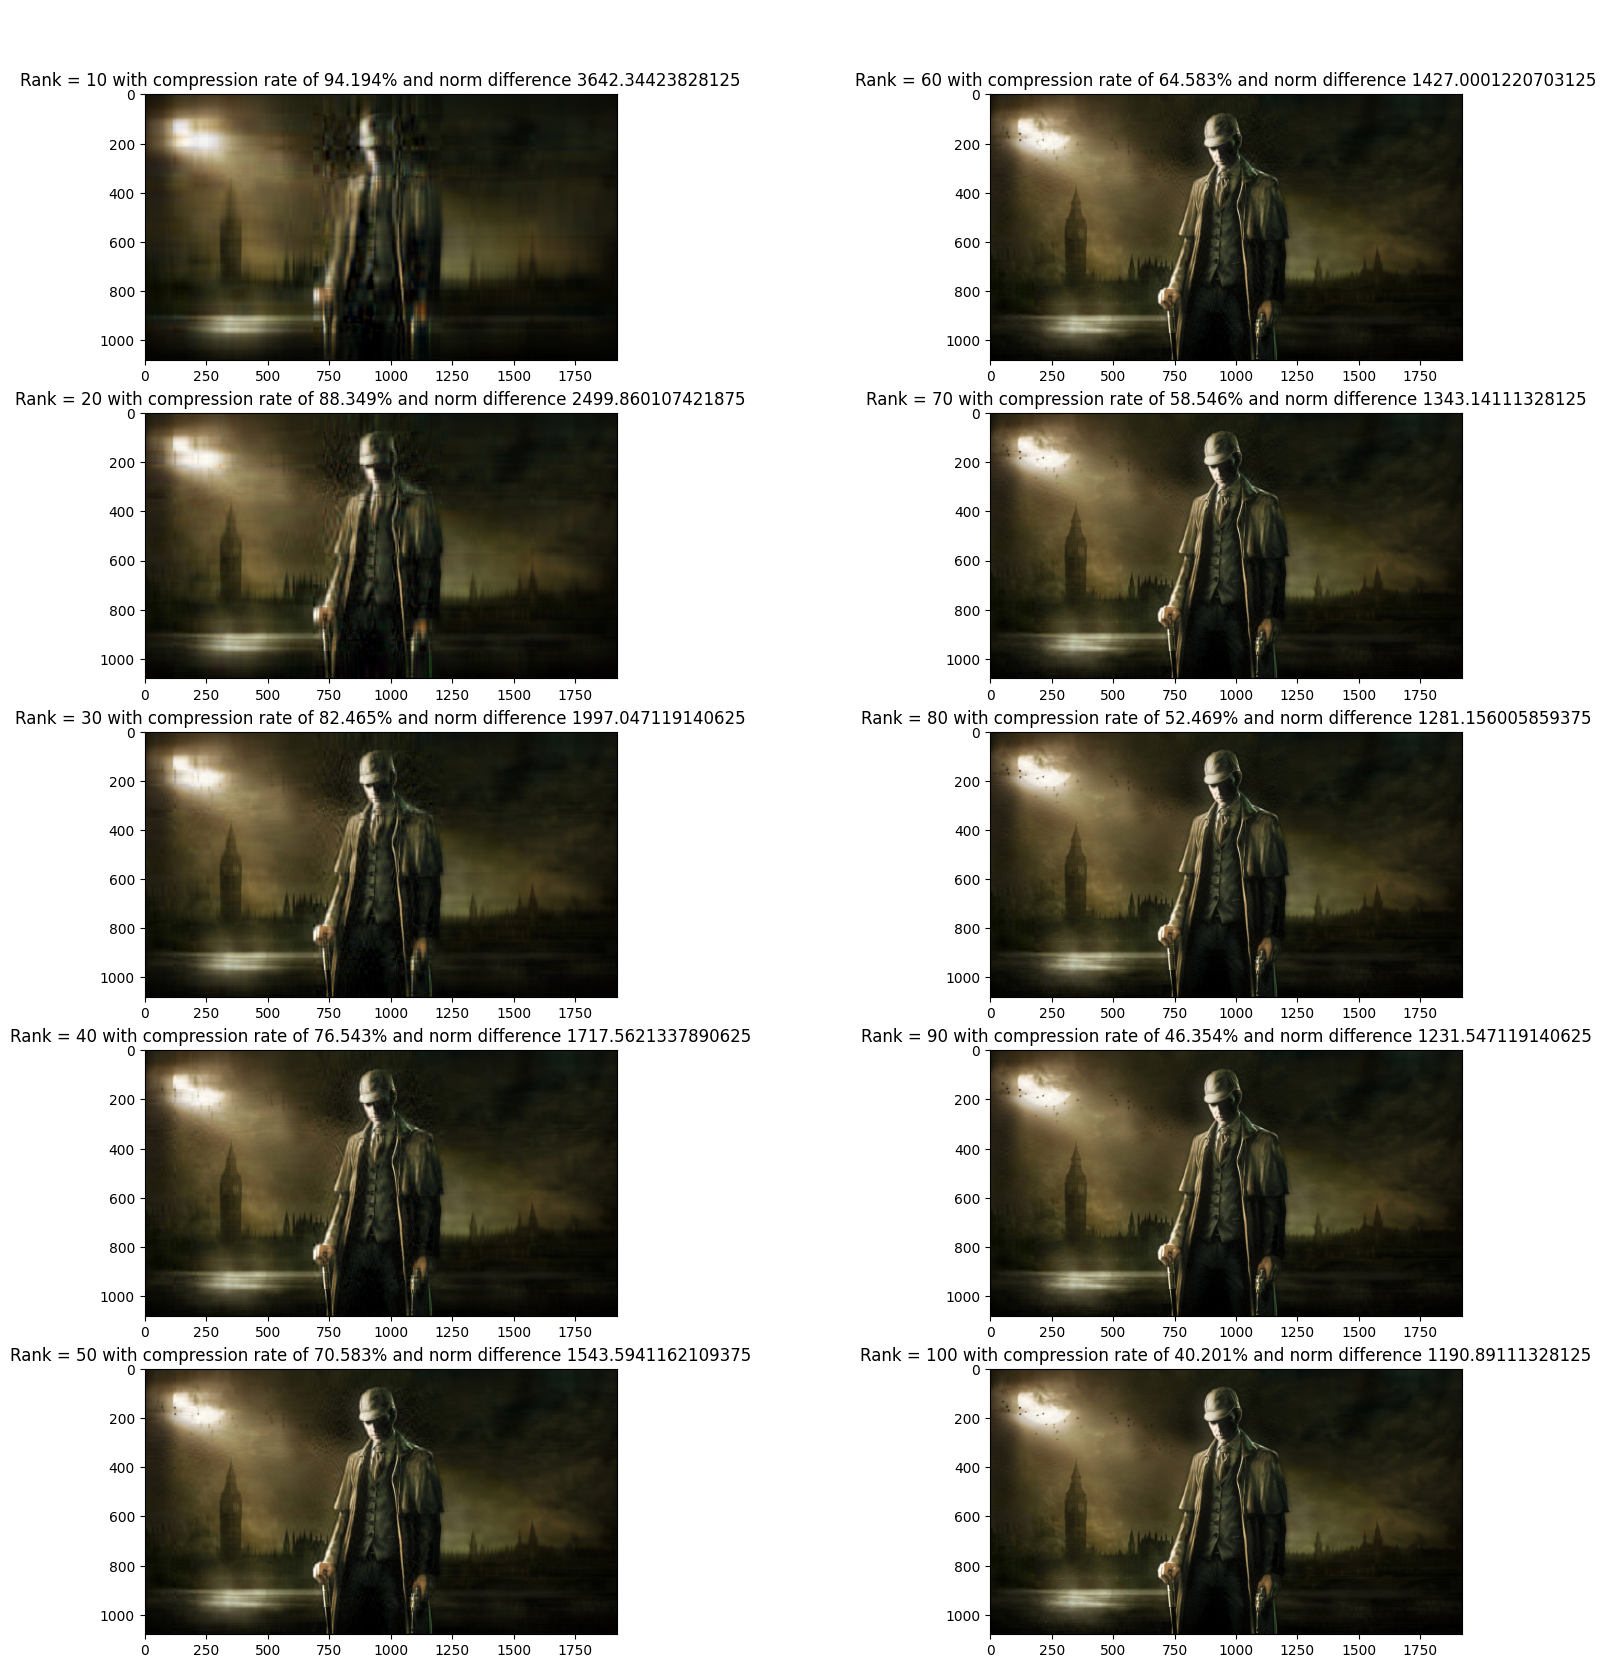

In [8]:
ranks = range(10, 110, 10)

fig, axs = plt.subplots(5, 2, figsize=(20,20))

for idx, r in tqdm.tqdm(enumerate(ranks)):
    approx_img, sigmas, memory_size = SVD([img_red, img_green, img_blue], rank=r)

    approx_img = jnp.array(approx_img, dtype=jnp.uint8)
    norm_diff = img_frob_norm - jnp.linalg.norm(approx_img)
    compression_percentage = ((original_img_size - memory_size) / original_img_size) * 100

    x = idx-5 if (idx > 4) else idx
    y = 0 if (idx < 5) else 1
    axs[x, y].imshow(approx_img)
    axs[x, y].set_title(f'\n\n\nRank = {r} with compression rate of {round(compression_percentage, 3)}% and norm difference {round(norm_diff, 3)}')

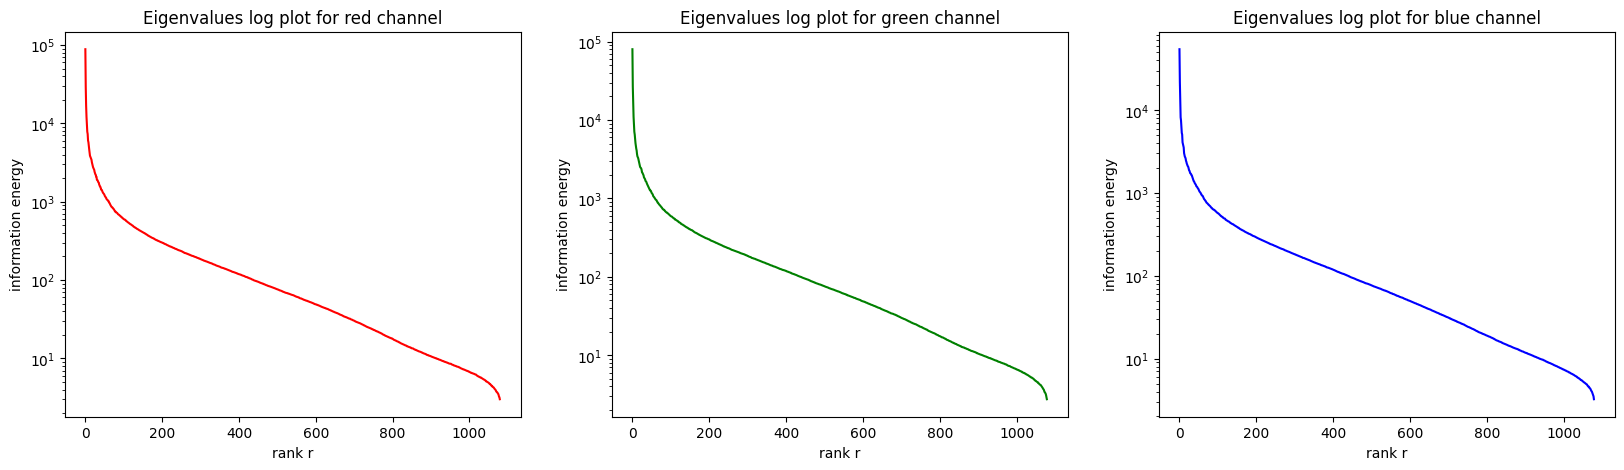

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
channels = ['red', 'green', 'blue']
for idx, S in enumerate(sigmas):
    axs[idx].semilogy(S, c=channels[idx])
    axs[idx].set_ylabel('information energy')
    axs[idx].set_xlabel('rank r')
    axs[idx].set_title(f'Eigenvalues log plot for {channels[idx]} channel')
    

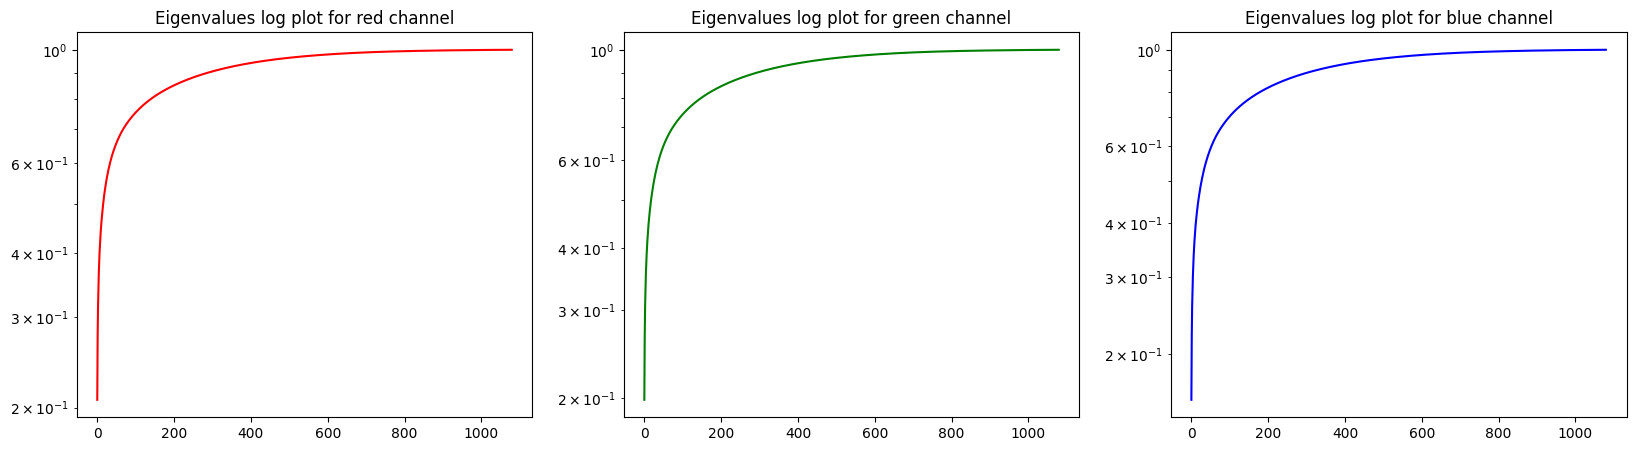

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
channels = ['red', 'green', 'blue']
for idx, S in enumerate(sigmas):
    sigma_cumsum = jnp.cumsum(S)
    sigma_sum = jnp.sum(S)
    axs[idx].semilogy(sigma_cumsum/sigma_sum, c=channels[idx])
    axs[idx].set_title(f'Eigenvalues log plot for {channels[idx]} channel')